# Predicting Heart Disease

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)

sns.set_theme(style="whitegrid")

## EDA:

### First Look

In [174]:
print("--- Data Ingestion & First Look ---")

df = pd.read_csv('heart.csv')

print(f"Dataset shape (rows, columns): {df.shape}\n")

print("First 5 rows (head):")
print(df.head())
print("\nLast 5 rows (tail):")
print(df.tail())

print("\nData types and non-null counts (info):")
df.info()

print(f"\nColumn names: {df.columns.tolist()}\n")

--- Data Ingestion & First Look ---
Dataset shape (rows, columns): (1025, 14)

First 5 rows (head):
   age  sex  cp  restbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0      125   212    0        1      168      0      1.0      2   
1   53    1   0      140   203    1        0      155      1      3.1      0   
2   70    1   0      145   174    0        1      125      1      2.6      0   
3   61    1   0      148   203    0        1      161      0      0.0      2   
4   62    0   0      138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Last 5 rows (tail):
      age  sex  cp  restbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1      140   221    0        1      164      1      0.0   
1021   60    1   0      125   258    0        0      141      1      2.8   
1022   47    1   0      110   275    0

### Univariate Analysis


--- Univariate Analysis ---

Descriptive statistics for numerical features:
               age          sex           cp      restbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.00572

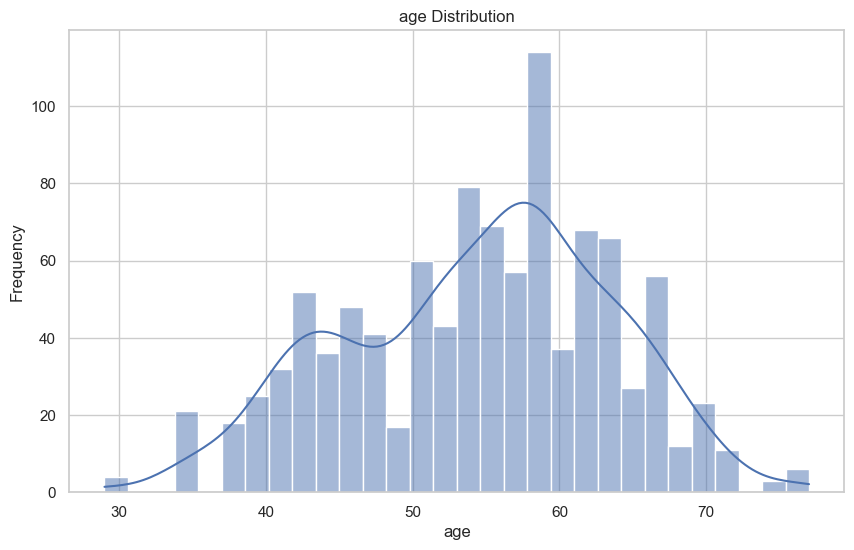

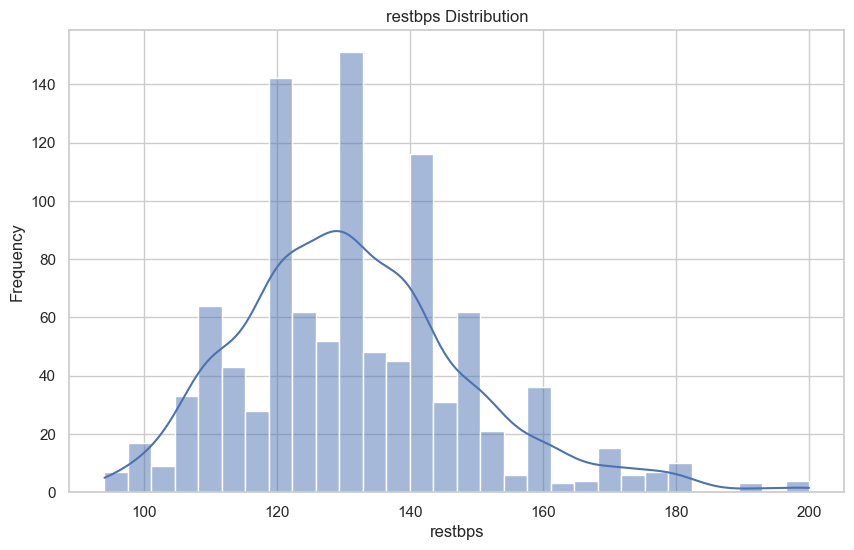

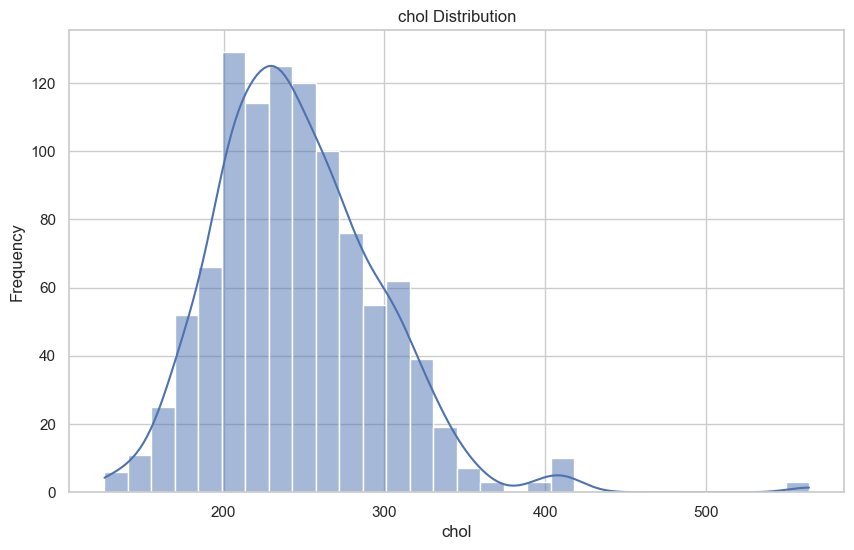

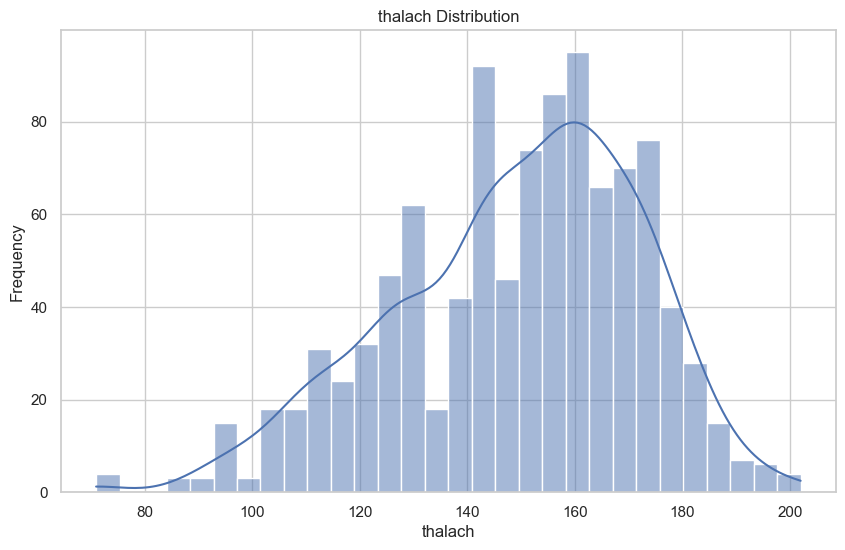

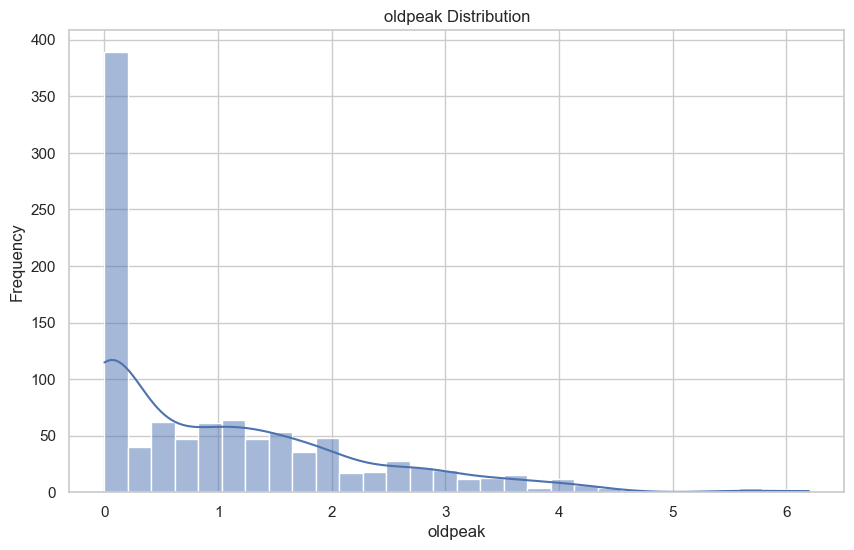

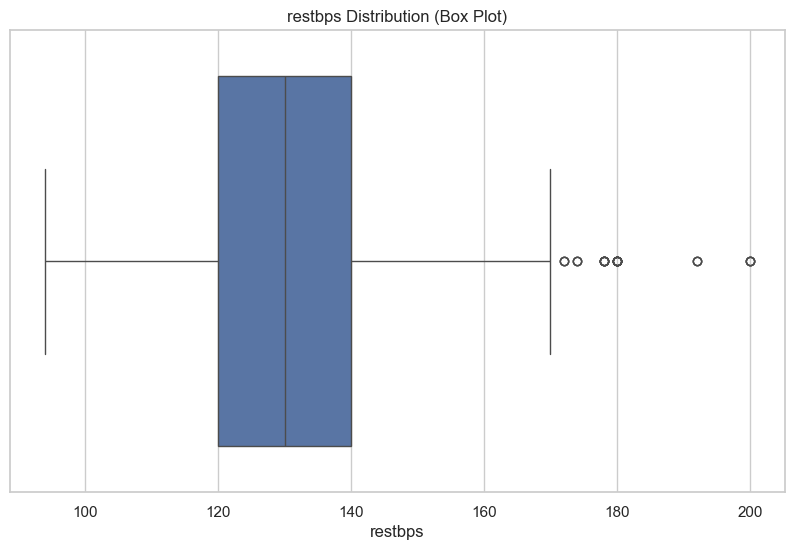


Value counts for 'cp':
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

Percentage counts for 'sex':
sex
1    0.69561
0    0.30439
Name: proportion, dtype: float64


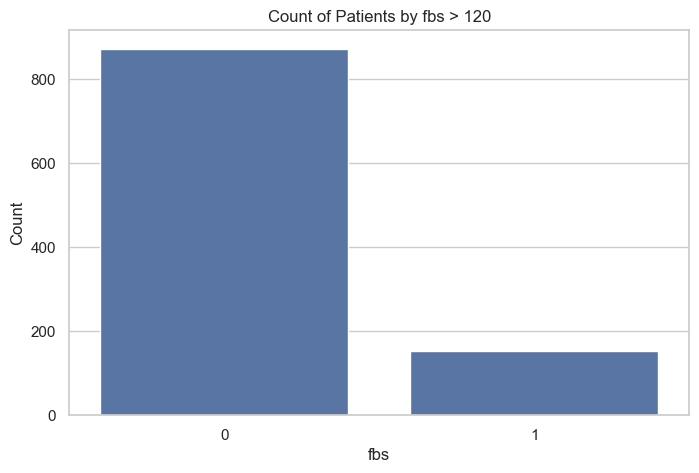

In [175]:
print("\n--- Univariate Analysis ---")

print("\nDescriptive statistics for numerical features:")
print(df.describe())

for i in ['age', 'restbps', 'chol', 'thalach', 'oldpeak']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[i], bins=30, kde=True)
    plt.title(f'{i} Distribution')
    plt.xlabel(f'{i}')
    plt.ylabel('Frequency')
    plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['restbps'])
plt.title('restbps Distribution (Box Plot)')
plt.xlabel('restbps')
plt.show()

print("\nValue counts for 'cp':")
print(df['cp'].value_counts())

print("\nPercentage counts for 'sex':")
print(df['sex'].value_counts(normalize=True))

plt.figure(figsize=(8, 5))
sns.countplot(x='fbs', data=df)
plt.title('Count of Patients by fbs > 120')
plt.xlabel('fbs')
plt.ylabel('Count')
plt.show()

### Heatmap


--- Heatmap ...

Correlation Matrix:
              age       sex        cp   restbps      chol       fbs   restecg  \
age      1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243 -0.132696   
sex     -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200 -0.055117   
cp      -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294  0.043581   
restbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767 -0.123794   
chol     0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917 -0.147410   
fbs      0.121243  0.027200  0.079294  0.181767  0.026917  1.000000 -0.104051   
restecg -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051  1.000000   
thalach -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866  0.048411   
exang    0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261 -0.065606   
oldpeak  0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859 -0.050114   
slope   -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902  0.

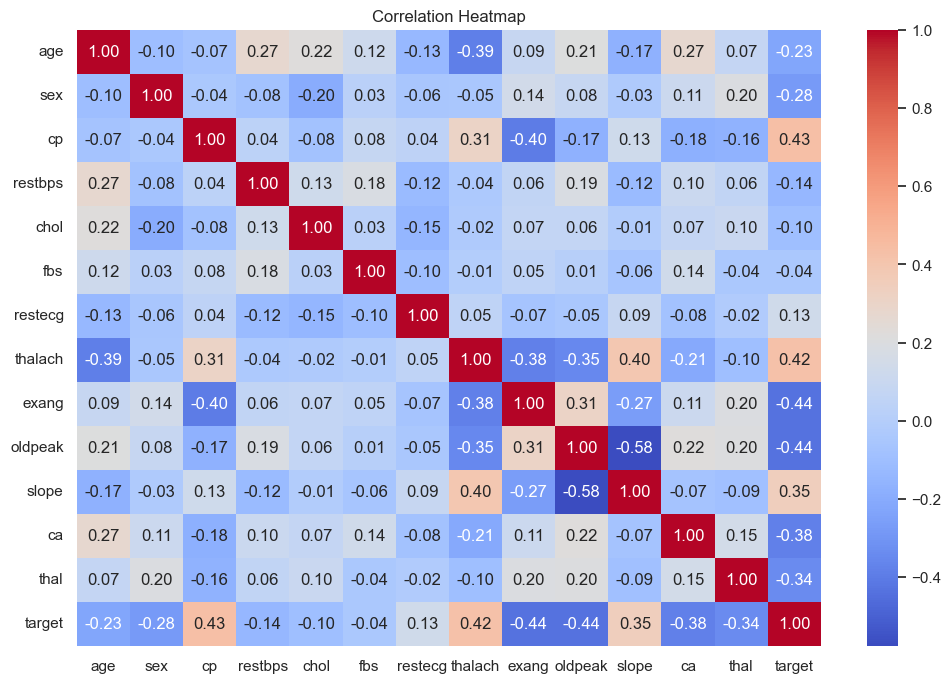

In [176]:
print("\n--- Heatmap ...")


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Summary

In [177]:
print("\n--- Phase 5: Documentation ---")
print("EDA complete. Review the plots and statistics.")
print("Example Insights Found:")
print("highest correlations with Target are :cp, thalach, slope, exang, oldpeak, ca")
print("'Age' has a relatively normal distribution.")
print("fbs and sex are unbalanced.")
print("fbs has the lowest correlation with target.")
print("chol and oldpeak are right skewed")



--- Phase 5: Documentation ---
EDA complete. Review the plots and statistics.
Example Insights Found:
highest correlations with Target are :cp, thalach, slope, exang, oldpeak, ca
'Age' has a relatively normal distribution.
fbs and sex are unbalanced.
fbs has the lowest correlation with target.
chol and oldpeak are right skewed


## Pre-Processing

In [178]:
print("Missing values per column:")
print(df.isnull().sum())

duplicate_count = df.duplicated().sum()
print(f"\nFound {duplicate_count} duplicate rows.")
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Dropped duplicate rows.")

Missing values per column:
age        0
sex        0
cp         0
restbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
target     0
dtype: int64

Found 723 duplicate rows.
Dropped duplicate rows.


In [179]:
print("df has no missing or duplicate values now.")

df has no missing or duplicate values now.


In [180]:
print("--- Phase 1: Setup and Data Splitting ---")


TARGET = 'target'


X = df.drop(TARGET, axis=1)
y = df[TARGET]

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}\n")

# --- Train-Test Split ---
# This is the MOST IMPORTANT step to do FIRST.
# We hold back 20% of the data for testing.
# We use 'stratify=y' to ensure the test set has the same
# proportion of survivors as the training set.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=69,
    stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}\n")

--- Phase 1: Setup and Data Splitting ---
Features (X) shape: (302, 13)
Target (y) shape: (302,)

X_train shape: (241, 13)
X_test shape: (61, 13)



In [181]:
print("--- Phase 2: Building the Preprocessing Pipelines ---")

# We will build separate pipelines for each type of data.
# This makes the code clean and prevents errors.

# We first identify which columns belong to which group
# (This is a manual step based on our EDA)

# --- Sub-Pipeline 1: Numerical Features ---
# 'age', 'restbps', 'chol', 'thalach', 'oldpeak'
# We will:
# 1. Impute missing values with the median (robust to outliers), although we don't need to because there are no missing data.
# 2. Scale the features using StandardScaler (makes mean=0, std=1)
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# --- Sub-Pipeline 2: Skewed Numerical Features ---
# Let's say we identified 'oldpeak' as highly skewed during EDA.
# We can create a separate pipeline for it.
# 1. Impute with median
# 2. Use PowerTransformer (Yeo-Johnson) to make it more "normal" (Gaussian-like)
# 3. Scale the result using StandardScaler
skewed_num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])

# --- Sub-Pipeline 3: Nominal (Unordered) Categorical Features ---
# 'sex', 'cp', 'fbs', 'exang', 'thal'
# We will:
# 1. Impute missing values with the most_frequent value (mode)
# 2. One-Hot Encode the categories into new binary columns
nominal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    # 'handle_unknown='ignore'' prevents errors if a rare category
    # appears in the test set but not the train set.
])

# --- Sub-Pipeline 4: Ordinal (Ordered) Categorical Features ---
# 'fbs'(1>0), 'restecg', 'slope', 'ca'
# We need to define the order explicitly
p_order = [[0, 1], [0, 1, 2], [0, 1, 2], [0, 1, 2, 3, 4]]
# We will:
# 1. Impute missing values (if any) with the mode.
# 2. Encode the categories as numbers (0, 1, 2)
ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=p_order, handle_unknown='use_encoded_value', unknown_value=-1))
])

--- Phase 2: Building the Preprocessing Pipelines ---


In [182]:
print("--- Phase 3: Combining Pipelines with ColumnTransformer ---")

# First, let's define the lists of columns for each pipeline
# We'll treat 'age' and 'restbps' and 'thalach' as standard numerical
# We'll treat 'oldpeak' and 'chol' as skewed numerical
# We'll treat 'fbs', 'restecg', 'slope' and 'ca' as ordinal
# We'll treat 'sex', 'cp', 'fbs', 'exang' and 'thal' as nominal

num_features = ['age', 'restbps', 'chol', 'thalach', 'oldpeak']
skewed_num_features = ['oldpeak', 'chol']
ordinal_features = ['fbs', 'restecg', 'slope', 'ca']
nominal_features = ['sex', 'cp', 'fbs', 'exang', 'thal']

# Now we create the master preprocessor
# This object will apply the right pipeline to the right columns
preprocessor = ColumnTransformer(
    transformers=[
        # (name, pipeline_object, column_list)
        ('numeric', numerical_pipeline, num_features),
        ('skewed_numeric', skewed_num_pipeline, skewed_num_features),
        ('ordinal', ordinal_pipeline, ordinal_features),
        ('nominal', nominal_pipeline, nominal_features)
    ],
    remainder='drop'  # 'drop' any columns not listed, 'passthrough' would keep them
)

--- Phase 3: Combining Pipelines with ColumnTransformer ---


In [183]:
print("--- Phase 4: Fitting and Transforming the Data ---")

# --- Fit on Training Data ---
# We call .fit_transform() on the *training data only*
# This "learns" the medians, modes, scaling parameters, and categories
# from X_train and then transforms X_train.
print("Fitting preprocessor on X_train...")
X_train_preprocessed = preprocessor.fit_transform(X_train)
print("...Done.\n")

# --- Transform Test Data ---
# We call .transform() on the *test data*
# This applies the parameters *learned from the training set*
# to the test set. This prevents any data leakage.
print("Transforming X_test...")
X_test_preprocessed = preprocessor.transform(X_test)
print("...Done.\n")

print(f"Original X_train shape: {X_train.shape}")
print(f"Preprocessed X_train shape: {X_train_preprocessed.shape}")
print(f"Preprocessed X_test shape: {X_test_preprocessed.shape}")

--- Phase 4: Fitting and Transforming the Data ---
Fitting preprocessor on X_train...
...Done.

Transforming X_test...
...Done.

Original X_train shape: (241, 13)
Preprocessed X_train shape: (241, 25)
Preprocessed X_test shape: (61, 25)


In [184]:
print("\n--- Phase 5: Inspecting the Preprocessed Output ---")

# The output is a NumPy array, which is what models want.
# But the column names are gone! Let's get them back.
# We can use the .get_feature_names_out() method

feature_names = preprocessor.get_feature_names_out()
print(f"Total {len(feature_names)} features after preprocessing:")
print(list(feature_names))

# Let's put the preprocessed data back into a DataFrame to see it
df_train_preprocessed = pd.DataFrame(
    X_train_preprocessed,
    columns=feature_names,
    index=X_train.index
)

print("\nHead of preprocessed training data:")
print(df_train_preprocessed.head())

print("\nDescriptive stats of preprocessed training data:")
# Note how 'numeric' and 'skewed_numeric' columns
# now have a mean very close to 0 and std dev of 1.
print(df_train_preprocessed.describe().round(2))


--- Phase 5: Inspecting the Preprocessed Output ---
Total 25 features after preprocessing:
['numeric__age', 'numeric__restbps', 'numeric__chol', 'numeric__thalach', 'numeric__oldpeak', 'skewed_numeric__oldpeak', 'skewed_numeric__chol', 'ordinal__fbs', 'ordinal__restecg', 'ordinal__slope', 'ordinal__ca', 'nominal__sex_0', 'nominal__sex_1', 'nominal__cp_0', 'nominal__cp_1', 'nominal__cp_2', 'nominal__cp_3', 'nominal__fbs_0', 'nominal__fbs_1', 'nominal__exang_0', 'nominal__exang_1', 'nominal__thal_0', 'nominal__thal_1', 'nominal__thal_2', 'nominal__thal_3']

Head of preprocessed training data:
     numeric__age  numeric__restbps  numeric__chol  numeric__thalach  \
41       0.000459         -0.647259       0.265888         -0.106394   
270     -1.215181         -1.230833      -0.637716          0.505147   
189      1.105585         -0.355472       1.246394         -0.805299   
30      -1.104668         -0.647259      -1.445191         -0.237439   
147     -1.436206         -1.230833      

## Modeling

In [185]:
print("--- Practical Step 3: Build, Train & Predict ---")

# We will create 5 separate, complete pipelines.
# Each pipeline combines the *preprocessor* with one *model*.
# This is the best practice.

# Model 1: K-Nearest Neighbors (KNN)
print("Building KNN pipeline...")
full_pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# Model 2: Logistic Regression
print("Building Logistic Regression pipeline...")
full_pipeline_log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=69, max_iter=1000))
])

# Model 3: Decision Tree
print("Building Decision Tree pipeline...")
full_pipeline_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=69))
])

# Model 4: LDA
print("Building LDA pipeline...")
full_pipeline_lda = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'))
])

# Model 5: QDA
print("Building QDA pipeline...")
full_pipeline_qda = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', QuadraticDiscriminantAnalysis(reg_param=0.001))
])

# --- Train All Models ---
print("\n--- Training all three models ---")

# Train KNN
print("Training KNN...")
full_pipeline_knn.fit(X_train, y_train)
print("...KNN training complete.")

# Train Logistic Regression
print("Training Logistic Regression...")
full_pipeline_log_reg.fit(X_train, y_train)
print("...Logistic Regression training complete.")

# Train Decision Tree
print("Training Decision Tree...")
full_pipeline_tree.fit(X_train, y_train)
print("...Decision Tree training complete.\n")

# Train LDA
print("Training LDA...")
full_pipeline_lda.fit(X_train, y_train)
print("... LDA training complete.\n")

# Train QDA
print("Training QDA...")
full_pipeline_qda.fit(X_train, y_train)
print("...QDA training complete.\n")

# --- Make Predictions on the Test Set ---
print("--- Making predictions on X_test ---")

# Predict with KNN
y_pred_knn = full_pipeline_knn.predict(X_test)

# Predict with Logistic Regression
y_pred_log_reg = full_pipeline_log_reg.predict(X_test)

# Predict with Decision Tree
y_pred_tree = full_pipeline_tree.predict(X_test)

# Predict with LDA
y_pred_lda = full_pipeline_lda.predict(X_test)

# Predict with QDA
y_pred_qda = full_pipeline_qda.predict(X_test)

print("...All predictions are complete.\n")

# --- Show Example Predictions ---
print("--- Example Predictions ---")
# Let's create a DataFrame to easily compare them
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'KNN_Prediction': y_pred_knn,
    'LogReg_Prediction': y_pred_log_reg,
    'Tree_Prediction': y_pred_tree,
    'LDA_Prediction': y_pred_lda,
    'QDA_Prediction': y_pred_qda
})

print("Comparison of actual values vs. model predictions (first 20 rows):")
print(predictions_df.head(20))

--- Practical Step 3: Build, Train & Predict ---
Building KNN pipeline...
Building Logistic Regression pipeline...
Building Decision Tree pipeline...
Building LDA pipeline...
Building QDA pipeline...

--- Training all three models ---
Training KNN...
...KNN training complete.
Training Logistic Regression...
...Logistic Regression training complete.
Training Decision Tree...
...Decision Tree training complete.

Training LDA...
... LDA training complete.

Training QDA...
...QDA training complete.

--- Making predictions on X_test ---
...All predictions are complete.

--- Example Predictions ---
Comparison of actual values vs. model predictions (first 20 rows):
     Actual  KNN_Prediction  LogReg_Prediction  Tree_Prediction  \
281       1               1                  1                1   
402       1               1                  1                0   
11        0               0                  0                0   
299       1               1                  1                1  

In [186]:
# We will store our models and predictions in dictionaries for easy access
pipelines = {
    "KNN": Pipeline(steps=[('preprocessor', preprocessor), ('model', KNeighborsClassifier(n_neighbors=5))]),
    "LogisticRegression": Pipeline(
        steps=[('preprocessor', preprocessor), ('model', LogisticRegression(random_state=42, max_iter=1000))]),
    "DecisionTree": Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeClassifier(random_state=42))]),
    "LDA": Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'))]),
    "QDA": Pipeline(steps=[('preprocessor', preprocessor), ('model', QuadraticDiscriminantAnalysis(reg_param=0.001))])
}

predictions = {}
predictions_proba = {}  # For ROC curve

print("--- Training and Predicting ---")
for name, pipe in pipelines.items():
    print(f"Training {name}...")
    pipe.fit(X_train, y_train)
    # Get hard predictions (0 or 1)
    predictions[name] = pipe.predict(X_test)
    # Get probability predictions (for ROC)
    # We only want the probability of the positive class (1)
    if hasattr(pipe, "predict_proba"):
        predictions_proba[name] = pipe.predict_proba(X_test)[:, 1]
    else:
        # KNN doesn't have predict_proba by default in the same way, but we can get it
        predictions_proba[name] = pipe.predict_proba(X_test)[:, 1]

print("...All models trained and predictions made.\n")

--- Training and Predicting ---
Training KNN...
Training LogisticRegression...
Training DecisionTree...
Training LDA...
Training QDA...
...All models trained and predictions made.



## Evaluation

--- Model Evaluation ---

--- Results for KNN ---
Classification Report:
              precision    recall  f1-score   support

    Died (0)       0.83      0.71      0.77        28
Survived (1)       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Confusion Matrix:


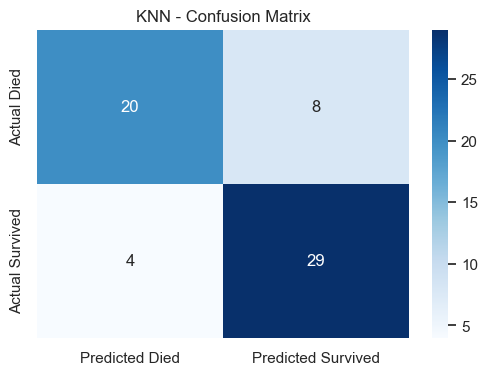


--- Results for LogisticRegression ---
Classification Report:
              precision    recall  f1-score   support

    Died (0)       0.92      0.82      0.87        28
Survived (1)       0.86      0.94      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

Confusion Matrix:


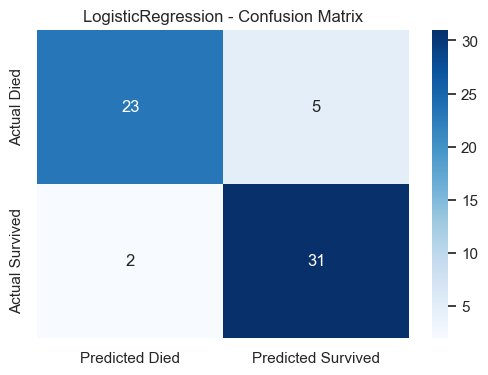


--- Results for DecisionTree ---
Classification Report:
              precision    recall  f1-score   support

    Died (0)       0.83      0.71      0.77        28
Survived (1)       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Confusion Matrix:


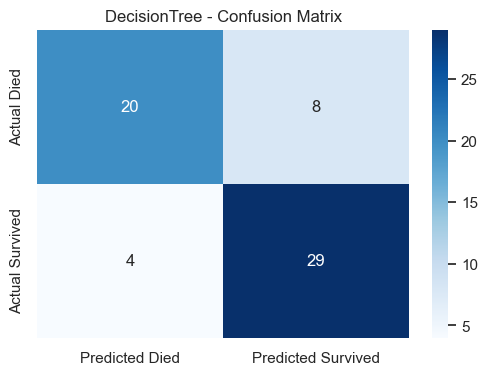


--- Results for LDA ---
Classification Report:
              precision    recall  f1-score   support

    Died (0)       0.88      0.82      0.85        28
Survived (1)       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:


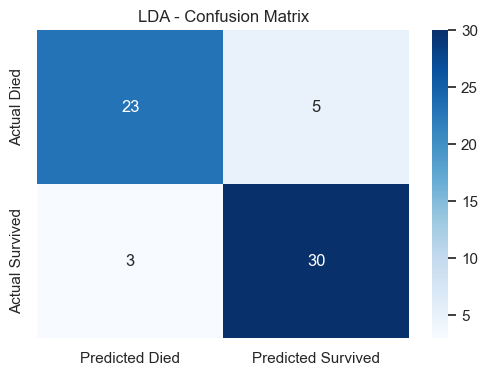


--- Results for QDA ---
Classification Report:
              precision    recall  f1-score   support

    Died (0)       0.83      0.71      0.77        28
Survived (1)       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Confusion Matrix:


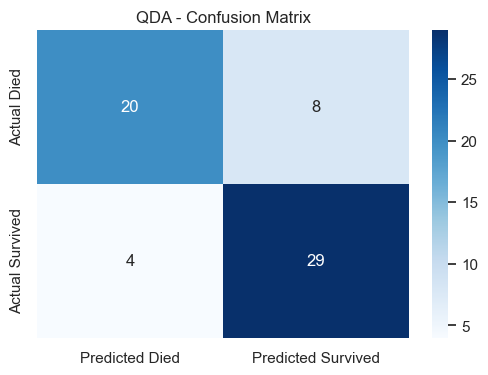


--- ROC Curve Comparison ---


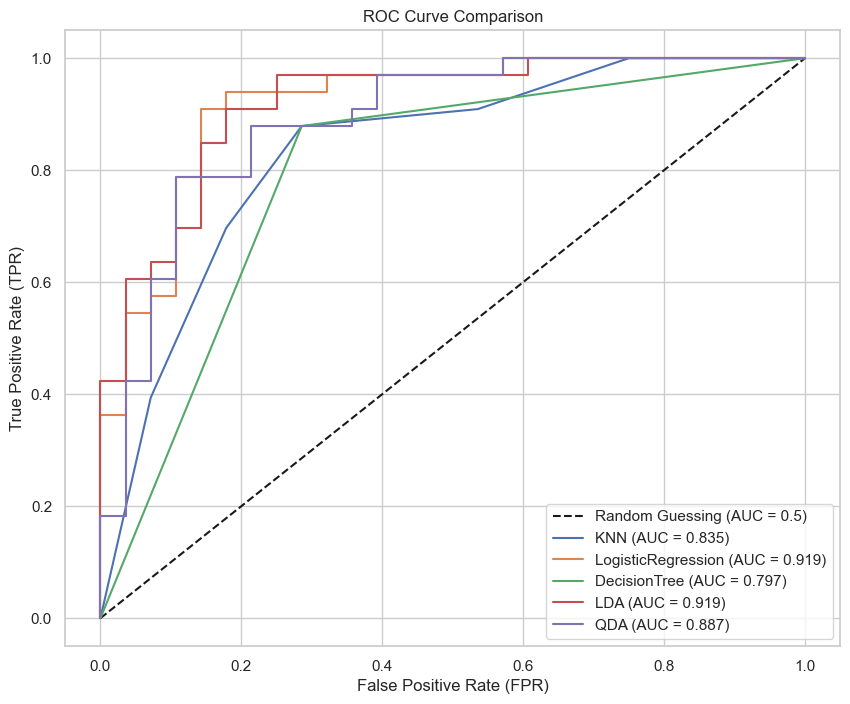


--- 10-Fold Cross-Validation (Robustness Check) ---
Model: KNN
  All 10 scores: [0.742 0.806 0.833 0.8   0.9   0.933 0.733 0.8   0.8   0.733]
  Mean Accuracy: 0.808
  Std Deviation: 0.064
--------------------
Model: LogisticRegression
  All 10 scores: [0.871 0.871 0.833 0.8   0.9   1.    0.833 0.8   0.733 0.8  ]
  Mean Accuracy: 0.844
  Std Deviation: 0.069
--------------------
Model: DecisionTree
  All 10 scores: [0.935 0.742 0.733 0.667 0.767 0.833 0.733 0.633 0.733 0.733]
  Mean Accuracy: 0.751
  Std Deviation: 0.080
--------------------
Model: LDA
  All 10 scores: [0.871 0.871 0.8   0.767 0.867 1.    0.833 0.8   0.733 0.8  ]
  Mean Accuracy: 0.834
  Std Deviation: 0.070
--------------------
Model: QDA
  All 10 scores: [0.806 0.839 0.733 0.733 0.767 0.933 0.8   0.7   0.733 0.8  ]
  Mean Accuracy: 0.785
  Std Deviation: 0.064
--------------------


In [187]:
print("--- Model Evaluation ---")

for name, y_pred in predictions.items():
    print(f"\n--- Results for {name} ---")

    # This gives you Precision, Recall, and F1-Score all at once!
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Died (0)", "Survived (1)"]))

    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Predicted Died", "Predicted Survived"],
                yticklabels=["Actual Died", "Actual Survived"])
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

print("\n--- ROC Curve Comparison ---")
plt.figure(figsize=(10, 8))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.5)')

for name, probas in predictions_proba.items():
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("\n--- 10-Fold Cross-Validation (Robustness Check) ---")
# This runs the *entire* fit/predict process 10 times
# We use the full X and y, not the train/test split

for name, pipe in pipelines.items():
    # 'cv=10' means 10-fold
    # 'scoring='accuracy'' is what we'll measure
    scores = cross_val_score(pipe, X, y, cv=10, scoring='accuracy')

    print(f"Model: {name}")
    print(f"  All 10 scores: {np.round(scores, 3)}")
    print(f"  Mean Accuracy: {scores.mean():.3f}")
    print(f"  Std Deviation: {scores.std():.3f}")
    print("-" * 20)

## Optional

In [188]:
print("--- Practical Step 3: Build, Train & Predict (Advanced Models) ---")

# We will create a dictionary to hold our new models
# We use 'pipelines' to ensure preprocessing is identical
pipelines = {}

# Model 4: Random Forest
# Intuition: An "ensemble" model. It builds hundreds of
# different Decision Trees on random subsets of the data
# and features. To make a prediction, it takes a "majority vote"
# from all the trees. This fixes the overfitting problem of single trees.
print("Building Random Forest pipeline...")
pipelines['RandomForest'] = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
    # n_estimators=100 means build 100 trees
])

# Model 5: Support Vector Machine (SVM)
# Intuition: A "maximum margin" classifier. It tries to find the
# single best line (or hyperplane in high dimensions) that
# separates the classes with the *widest possible margin* or "street".
#
print("Building SVM pipeline...")
pipelines['SVM'] = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVC(random_state=42, probability=True))
    # *** CRITICAL ***: We *must* set probability=True
    # so we can get the scores needed for the ROC curve.
    # This can make it train slower.
])

# Model 6: Naive Bayes (Gaussian)
# Intuition: A fast, simple model based on probability (Bayes' Theorem).
# It's "naive" because it assumes all features are independent
# of each other (e.g., 'age' has no effect on 'fare').
# We use 'GaussianNB' which assumes our continuous features
# (after scaling) are normally distributed (Gaussian).
print("Building Naive Bayes pipeline...")
pipelines['GaussianNB'] = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GaussianNB())
])

# --- Train and Predict (All Models) ---
predictions = {}
predictions_proba = {}  # For ROC curve

print("\n--- Training and Predicting for all models ---")
for name, pipe in pipelines.items():
    print(f"Training {name}...")
    pipe.fit(X_train, y_train)
    # Get hard predictions (0 or 1)
    predictions[name] = pipe.predict(X_test)
    # Get probability predictions (for ROC)
    predictions_proba[name] = pipe.predict_proba(X_test)[:, 1]

print("...All models trained and predictions made.\n")

--- Practical Step 3: Build, Train & Predict (Advanced Models) ---
Building Random Forest pipeline...
Building SVM pipeline...
Building Naive Bayes pipeline...

--- Training and Predicting for all models ---
Training RandomForest...
Training SVM...
Training GaussianNB...
...All models trained and predictions made.



--- Model Evaluation (Advanced Models) ---

==================== Results for RandomForest ====================

Classification Report:
              precision    recall  f1-score   support

    Died (0)       0.78      0.75      0.76        28
Survived (1)       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61

Confusion Matrix:


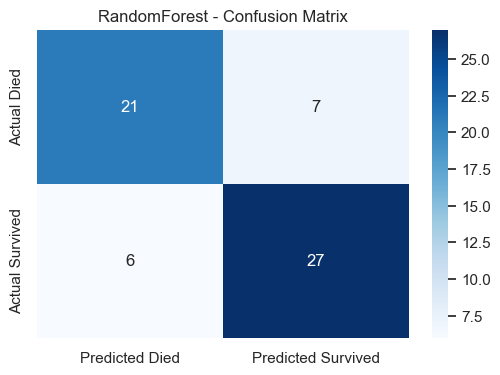


==================== Results for SVM ====================

Classification Report:
              precision    recall  f1-score   support

    Died (0)       0.91      0.75      0.82        28
Survived (1)       0.82      0.94      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61

Confusion Matrix:


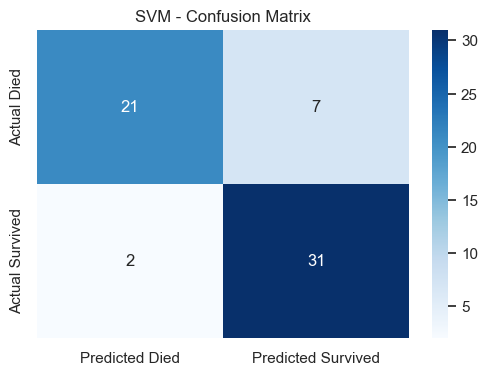


==================== Results for GaussianNB ====================

Classification Report:
              precision    recall  f1-score   support

    Died (0)       0.84      0.75      0.79        28
Survived (1)       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix:


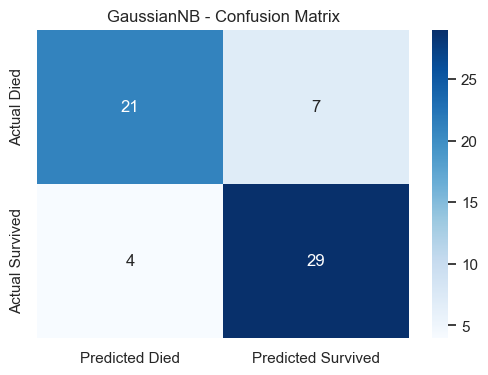


--- ROC Curve Comparison ---


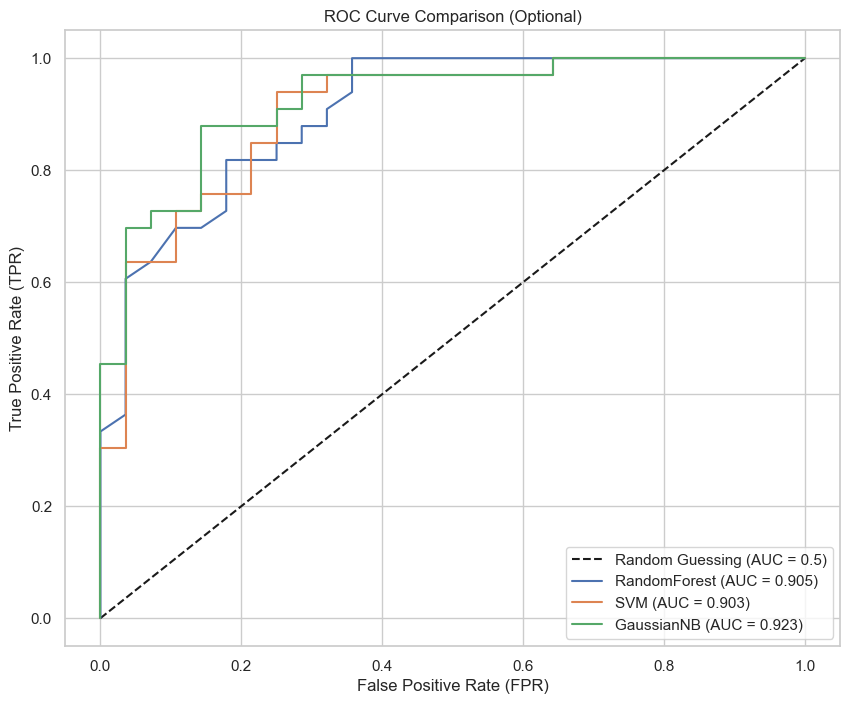


--- 10-Fold Cross-Validation (Robustness Check) ---
Model: RandomForest
  All 10 scores: [0.839 0.839 0.8   0.767 0.8   0.967 0.733 0.767 0.8   0.733]
  Mean Accuracy: 0.804 (±0.065)
------------------------------
Model: SVM
  All 10 scores: [0.774 0.871 0.833 0.8   0.867 1.    0.7   0.833 0.733 0.767]
  Mean Accuracy: 0.818 (±0.080)
------------------------------
Model: GaussianNB
  All 10 scores: [0.677 0.871 0.767 0.767 0.8   1.    0.8   0.733 0.733 0.8  ]
  Mean Accuracy: 0.795 (±0.084)
------------------------------

Evaluation complete. You can now compare these results to the basic models.


In [189]:
print("--- Model Evaluation (Advanced Models) ---")

for name, y_pred in predictions.items():
    print(f"\n==================== Results for {name} ====================")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["Died (0)", "Survived (1)"]))

    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Predicted Died", "Predicted Survived"],
                yticklabels=["Actual Died", "Actual Survived"])
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

print("\n--- ROC Curve Comparison ---")
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.5)')  # 50/50 line

for name, probas in predictions_proba.items():
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison (Optional)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("\n--- 10-Fold Cross-Validation (Robustness Check) ---")

for name, pipe in pipelines.items():
    scores = cross_val_score(pipe, X, y, cv=10, scoring='accuracy')

    print(f"Model: {name}")
    print(f"  All 10 scores: {np.round(scores, 3)}")
    print(f"  Mean Accuracy: {scores.mean():.3f} (±{scores.std():.3f})")
    print("-" * 30)

print("\nEvaluation complete. You can now compare these results to the basic models.")